In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
air_qual_df=pd.read_csv('/content/drive/My Drive/Space_Apps/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Read CSV File

In [ ]:
air_qual_df.head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,09/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"
1,13/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.81,"(6.436, -75.333431)"
2,15/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,21.01,"(6.436, -75.333431)"
3,18/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.73,"(6.436, -75.333431)"
4,20/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,24.72,"(6.436, -75.333431)"


Filter the DataFrame, taking only the CO concentration.

In [ ]:
co_df=air_qual_df[air_qual_df['Variable']=='CO'].copy()

Clean some of the data, drop the NaN values, an extract the month in order to group and plot their values.

In [ ]:
co_df['Fecha']=pd.to_datetime(co_df['Fecha'])
co_df=co_df.dropna()
co_df['mes']=co_df.Fecha.dt.to_period('M')

Group by municipality and month, then grab the concentration mean. This ensures that we will be able to plot aggregated data taking into account where measurements came from.

In [ ]:
prom=co_df.groupby(['Nombre del municipio','mes'])['Concentración'].mean().reset_index().sort_values(by=['Nombre del municipio','mes'])
prom['mes']=prom['mes'].dt.to_timestamp()
prom.to_csv('concentracion_municipio.csv',index=False)

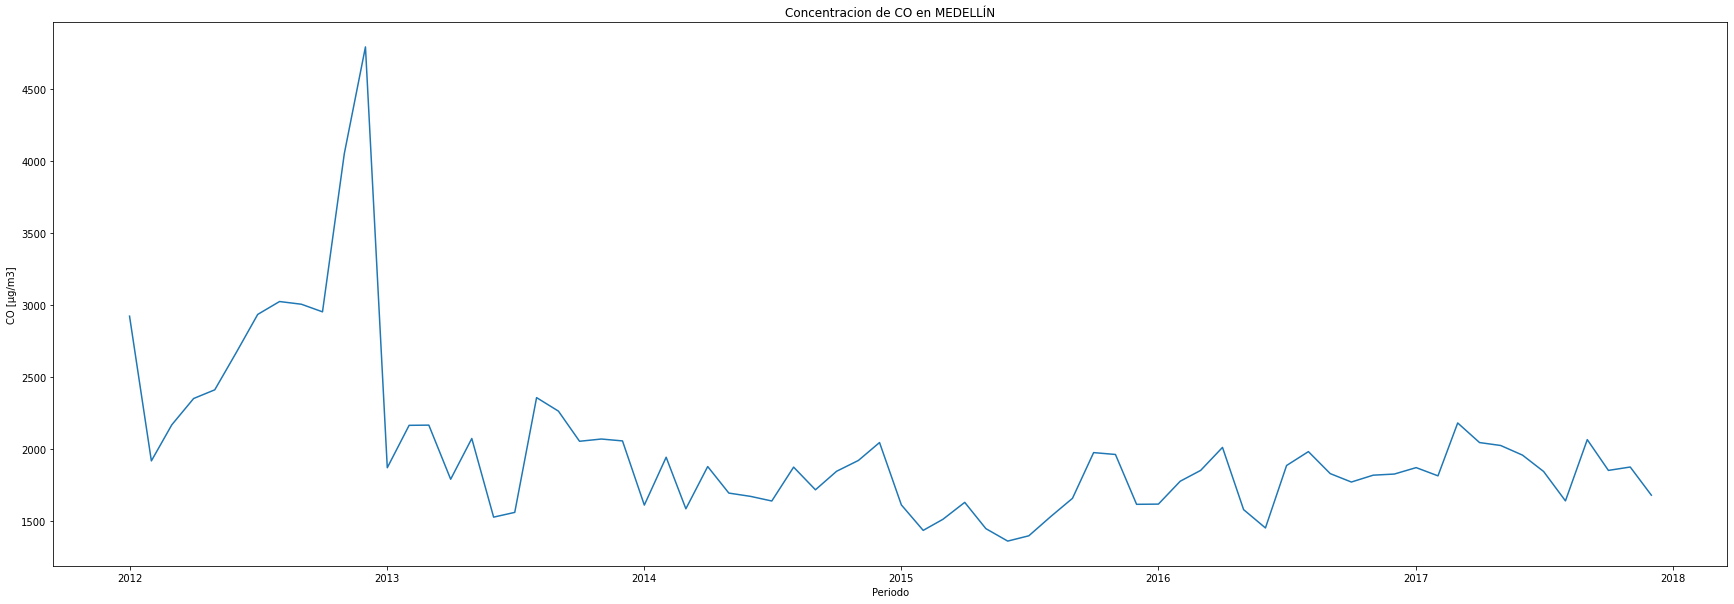

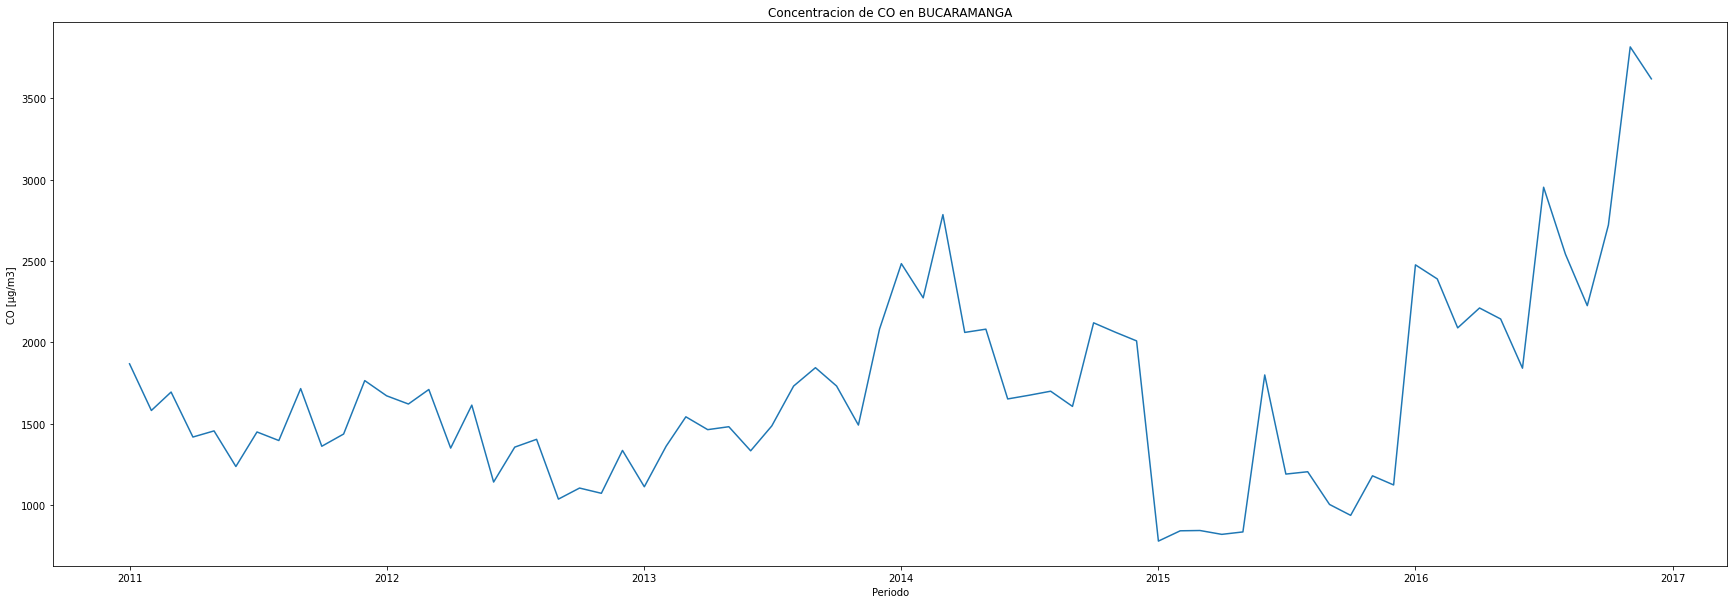

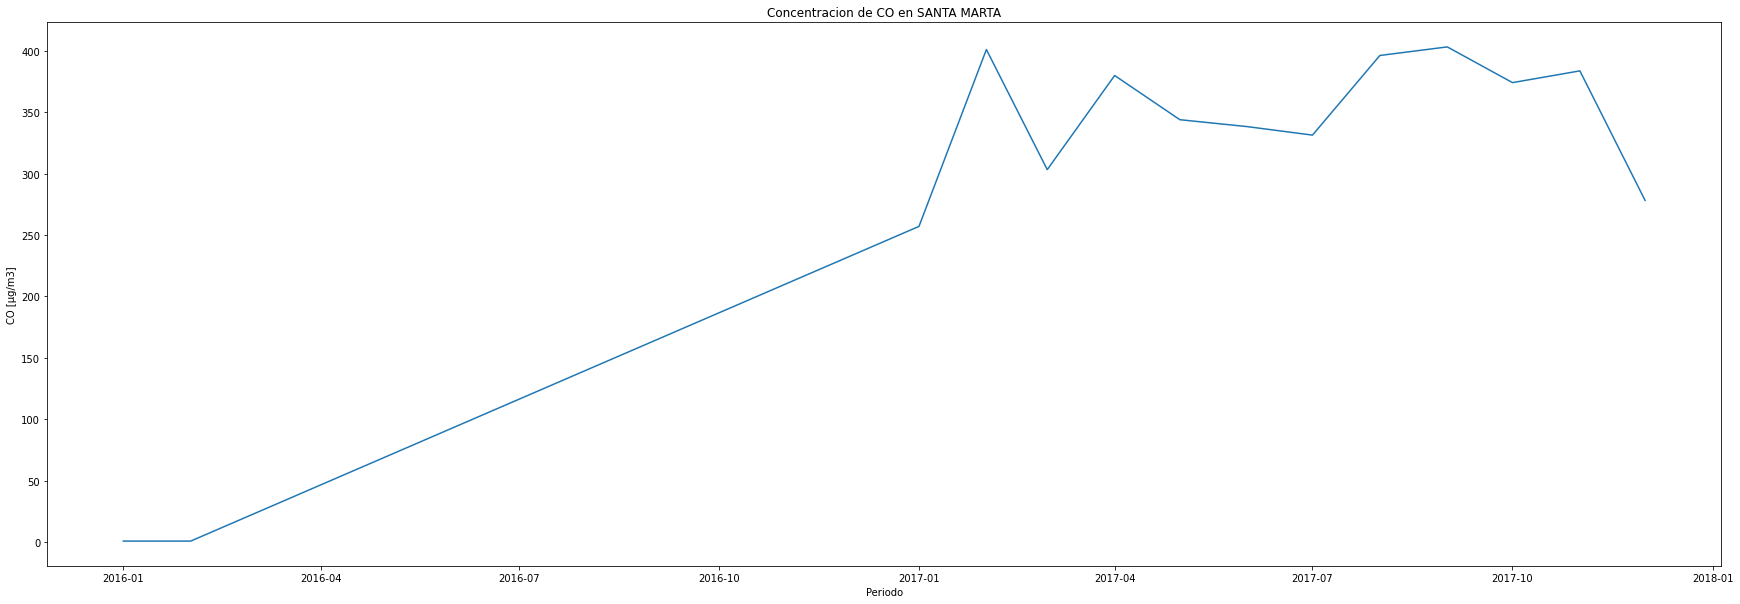

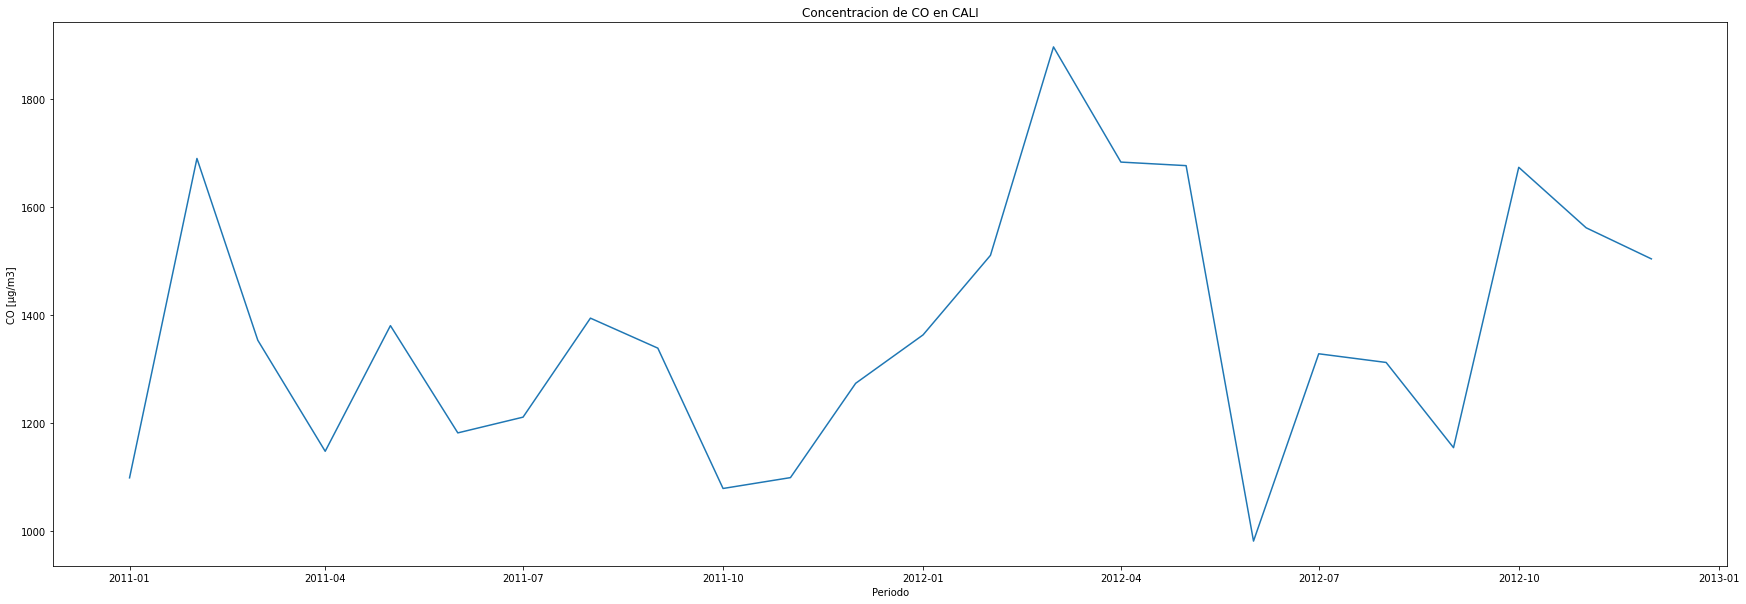

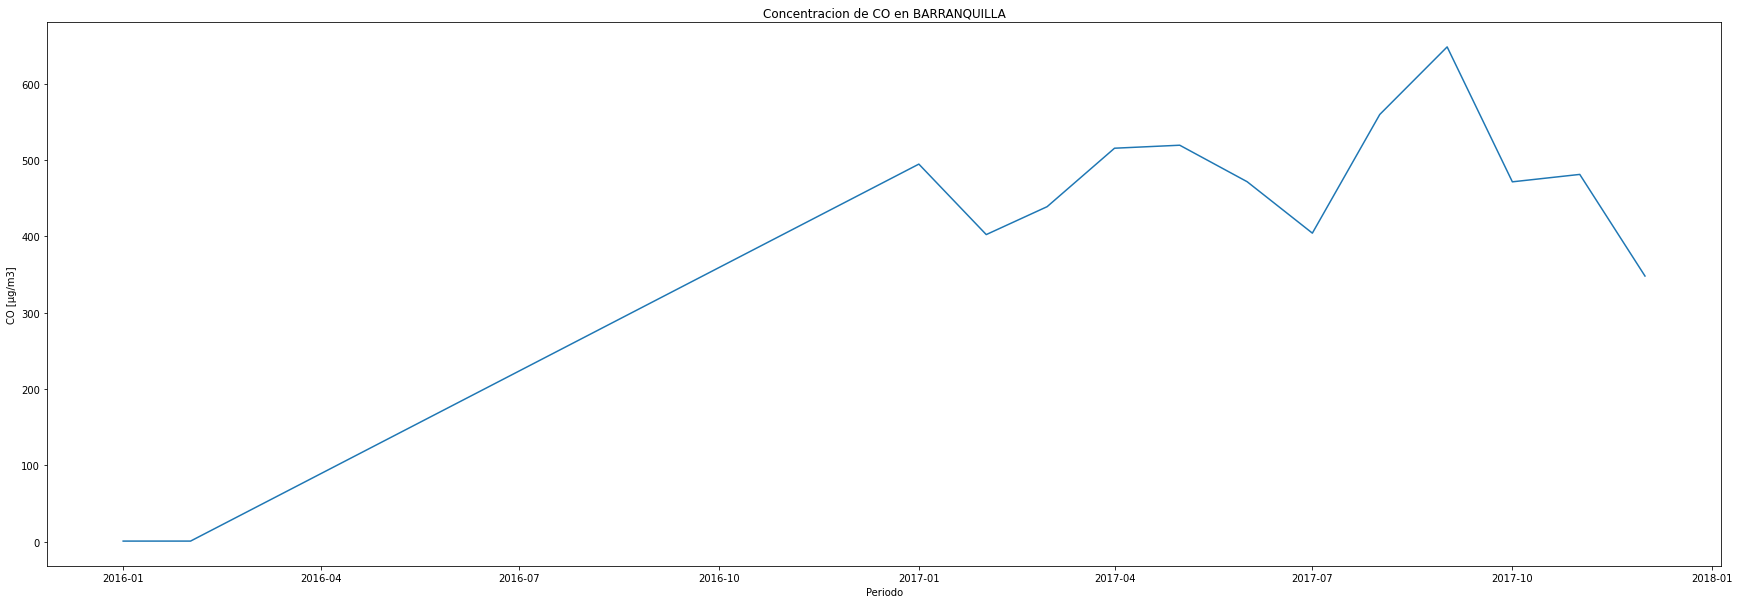

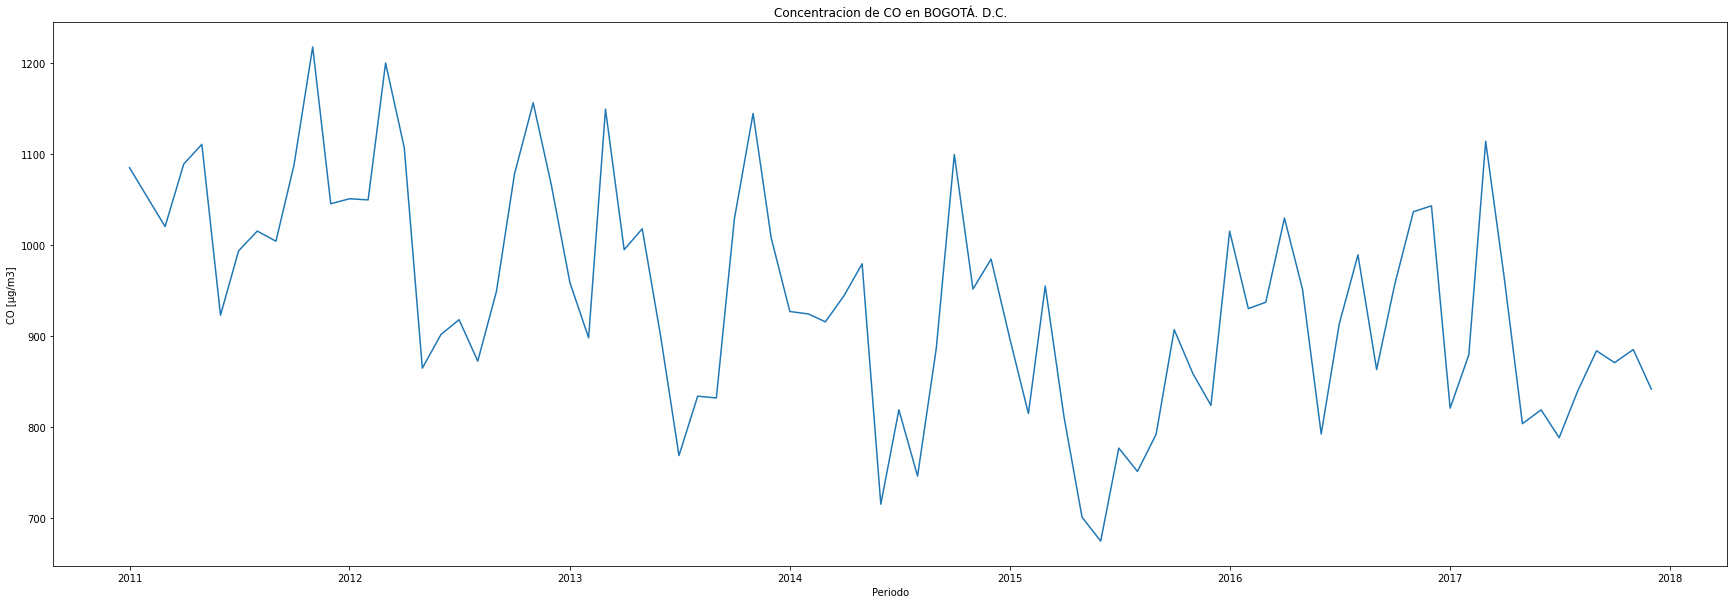

In [ ]:
municipios=['MEDELLÍN','BUCARAMANGA','SANTA MARTA','CALI','BARRANQUILLA','BOGOTÁ. D.C.']
for municipio in municipios:
  tmp=prom[prom['Nombre del municipio']==municipio]
  #title='concentracion_'+municipio+'.csv'
  #tmp.to_csv(title,index=False)
  plt.figure(figsize=(30,10))
  plt.title('Concentracion de CO en '+municipio)
  plt.xlabel('Periodo')
  plt.ylabel('CO [µg/m3]')
  plt.plot(tmp.mes,tmp.Concentración)
  plt.show()